# Analiza ankiety stackoverflow 2020
## Kamil Misiak

W tym sprawozdaniu przeprowadzę analizę zbioru danych zawierające dane z ankiety przeprowadzonej przez portal stackoverflow. Zbiór danych zostanie załadowany, oczyszczony i przeanalizowany.

## Agenda
1. Załadowanie zbioru danych i wstępne statystyki
2. Przygotowanie danych
3. Analiza i wizualizacja danych
4. Pomiar dokładności klasyfikacji
5. Podsumowanie

## Krok 1: Załadowanie zbioru danych i wstępne statystyki

In [2]:
# Przygotowanie danych
import pandas as pd
import numpy as np

# Wizualizacja
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dostosowanie wyglądu wizualizacji
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

# Klasyfikacja
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Scieżki do plików (dane, schemat)
data_file_name = './data/survey_results_public.csv'
schema_file_name = './data/survey_results_schema.csv'

# Załadowanie zbioru
data_raw = pd.read_csv(data_file_name, sep=',', header=0)

#### Następnie przyjrzmy się atrybutom które występują w zbiorze danych

In [3]:
data_raw.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

#### Następnie wyświetlimy 5 pierwszych rekordów

In [4]:
data_raw.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


#### Oraz końcowe 5 rekordów

In [5]:
data_raw.tail()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN
64460,65112,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Spain,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",ASP.NET Core;jQuery,Angular;Angular.js;ASP.NET Core;jQuery,NaN,NaN,NaN,NaN


#### Podgląd zbioru

In [6]:
print(data_raw.shape)
print('\n')
print(data_raw.dtypes)

(64461, 61)


Respondent              int64
MainBranch             object
Hobbyist               object
Age                   float64
Age1stCode             object
                       ...   
WebframeWorkedWith     object
WelcomeChange          object
WorkWeekHrs           float64
YearsCode              object
YearsCodePro           object
Length: 61, dtype: object


#### Liczba atrybutów oraz typ danych

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

Jak widać w zbiorze mamy 64461 rekrody, które zawierają 61 atrybutów.
#### Następnie wyświetlimy podstawowe statystki opisowe atrybutów

In [8]:
data_raw.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


#### Do zbioru danych dodatkowo dołączony jest plik zawierający opisy zawartości atrybutów

In [9]:
schema_raw = pd.read_csv(schema_file_name, index_col='Column')
pd.set_option('display.max_rows', schema_raw.shape[0]+1)
pd.set_option('max_colwidth', None)
schema_raw

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order of survey response time)
MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
Hobbyist,Do you code as a hobby?
Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
CompFreq,"Is that compensation weekly, monthly, or yearly?"
CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
Country,Where do you live?


Następnie przygotujemy zmienną dzięki której będziemy mogli odczytywać pytanie należące do danej kolumny.

In [10]:
schema_raw = pd.read_csv(schema_file_name, index_col='Column').QuestionText

In [11]:
# Dowolna nazwa kolumny
schema_raw['WorkWeekHrs']

'On average, how many hours per week do you work? Please enter a whole number in the box.'

## Krok 2: Przygotowanie danych

Niektóre kolumny posiadają źle określony typ danych, co może skutkować błędami w dalszym przygotowaniu zbioru do analizy. Nasze przygotowanie rozpoczniemy od wskazania prawidłowego typu danych w kolumnach.

Atrybut "Age" zawiera liczby typu "float" odzielone znakiem przecinka, co jest błędnie rozpoznawana przez interpreter. Aby typ kolumny został prawidłowo przekonwerotowany do typu float, musimy zamienieć znak przecnika na kropkę.

In [12]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

W atrybucie "Fare" dodatkowo jeden z wierszy zawiera znak alfanumeryczny. Musimy przefiltrować wartości kolumny, aby zawierała tylko cyfry.

In [13]:
len(selected_columns)

20

Po przekstałecniu typów danych tak prezentują się kolumny oraz 10 pierwszych wierszy zbioru.

In [14]:
data = data_raw[selected_columns].copy(deep=True)

In [15]:
schema = schema_raw[selected_columns]

Wyświetlimy podstawowe informacje o ramce danych

In [16]:
data.shape

(64461, 20)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Następnie określimy pradwidłowe typy dla naszy danych

Zaczniemy od atrybutu "Age1stCode"

In [18]:
schema['Age1stCode']

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

Według pytania, atrybut powinnien zawierać wartości liczbowe określające wiek osoby ankietowanej

In [19]:
data['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

Jak widać trafiają się również ciągi znaków np, "Older than 85". Zamiennimy te wartości na puste, ponieważ określają one warotści odstające, które nie są przydatne w anzalizie. Wykonamy tą samą operacje dla 'YearsCode' oraz 'YearsCodePro' ponieważ te atrybuty określają podobne wartości. Poniższe operacje przekstzałcą wartości liczobwe na liczby, a ciągi znaków na wartości puste.

In [20]:
data['Age1stCode'] = pd.to_numeric(data['Age1stCode'], errors='coerce')
data['YearsCode'] = pd.to_numeric(data['YearsCode'], errors='coerce')
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')

Wyświetlimy podstawe informacje po przekształceniu wartości

In [21]:
data.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


Wydaje się, że występuje problem z kolumną wieku, ponieważ minimalna wartość to 1, a maksymalna to 279. Jest to częsty problem z ankietami: odpowiedzi mogą zawierać nieprawidłowe wartości z powodu przypadkowych lub celowych błędów podczas odpowiadania. Prostym rozwiązaniem byłoby zignorowanie wierszy, w których wiek jest wyższy niż 100 lat lub niższy niż 10 lat, jako nieprawidłowe odpowiedzi na ankietę. Możemy to zrobić za pomocą metody .drop,

In [22]:
data.drop(data[data['Age'] < 10].index, inplace=True)
data.drop(data[data['Age'] > 100].index, inplace=True)

To samo dotyczy WorkWeekHrs. Zignorujmy wpisy, w których wartość kolumny jest większa niż 140 godzin. (~ 20 godzin dziennie).

In [23]:
data.drop(data[data['WorkWeekHrs'] > 140].index, inplace=True)

Kolumna płeć pozwala również na wybranie wielu opcji. Usuniemy wartości zawierające więcej niż jedną opcję, aby uprościć naszą analizę.

In [24]:
data['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [25]:
data.where(~(data['Gender'].str.contains(';', na=False)), np.nan, inplace=True)

Wyczyściliśmy teraz i przygotowaliśmy zbiór danych do analizy. Przyjrzyjmy się próbce wierszy z ramki danych.

In [26]:
data.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
24371,United States,30.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, or system administration",Yes,18.0,12.0,8.0,C#;HTML/CSS;JavaScript;SQL;TypeScript,C#;Dart;R,Once a year,Visit Stack Overflow;Go for a walk or other physical activity,Employed full-time,"Developer, full-stack;Educator",40.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;How widely used or impactful my work output would be",Often: 1-2 days per week or more,Fairly important
4742,United States,32.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,16.0,16.0,6.0,Bash/Shell/PowerShell;JavaScript;Perl;Python;Ruby;SQL,Bash/Shell/PowerShell;JavaScript;Python;R;Ruby;Rust;SQL;Swift;TypeScript,Once a year,Call a coworker or friend;Go for a walk or other physical activity;Panic;Do other work and come back later,Employed full-time,"Academic researcher;Data scientist or machine learning specialist;Developer, QA or test;Educator;Engineer, data;Scientist",40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional development,Sometimes: 1-2 days per month but less than weekly,Not at all important/not necessary
62227,Afghanistan,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or software engineering",Yes,18.0,4.0,NaN,C#;C++;HTML/CSS;Java;JavaScript;Kotlin;PHP;SQL,Assembly;C#;C++;HTML/CSS;Java;JavaScript;Kotlin;PHP;Python;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow;Watch help / tutorial videos,"Not employed, but looking for work","Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile",NaN,NaN,Specific department or team I’d be working on;How widely used or impactful my work output would be;Office environment or company culture,NaN,NaN
50530,Finland,40.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or software engineering",No,10.0,22.0,16.0,Java;Kotlin;Scala;SQL,Kotlin;Scala;SQL,Once every few years,Visit Stack Overflow;Do other work and come back later,"Independent contractor, freelancer, or self-employed","Developer, back-end;Developer, full-stack;Developer, mobile",30.0,Very satisfied,NaN,Sometimes: 1-2 days per month but less than weekly,Somewhat important
550,Turkey,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or software engineering",No,16.0,6.0,2.0,Objective-C;Swift,SQL,Once a year,Visit Stack Overflow;Go for a walk or other physical activity,Employed full-time,"Developer, mobile",10.0,Very satisfied,"Languages, frameworks, and other technologies I’d be working with;Specific department or team I’d be working on;Opportunities for professional development",Sometimes: 1-2 days per month but less than weekly,Very important
48363,Spain,32.0,Man,NaN,"Computer science, computer engineering, or software engineering",Yes,6.0,17.0,12.0,C;HTML/CSS;Java;JavaScript;Kotlin;Objective-C;PHP;SQL;Swift,C;Java;Kotlin;SQL;Swift,Once a year,Visit Stack Overflow;Panic,Employed full-time,"Developer, back-end;Developer, embedded applications or devices;Developer, front-end;Developer, mobile",40.0,Slightly dissatisfied,Flex time or a flexible schedule;Remote work options;Family friendliness,Rarely: 1-2 days per year or less,Somewhat important
22089,United States,25.0,Man,NaN,"Computer science, computer engineering, or software engineering",No,17.0,4.0,3.0,Bash/Shell/PowerShell;C#;Go;HTML/CSS;JavaScript;PHP;SQL,Bash/Shell/PowerShell;C#;C++;Go;PHP;Python;SQL,Once every few years,Play game

## Krok 3: Analiza i wizualizacja danych

Zanim zadamy pytania dotyczące odpowiedzi na ankietę, pomocne byłoby zrozumienie danych demograficznych respondentów, tj. Kraju, wieku, płci, poziomu wykształcenia, poziomu zatrudnienia itp. Konieczne jest zbadanie tych zmiennych, aby zrozumieć, jak reprezentatywna jest ankieta dla światowa społeczność programistów. Badanie tej skali zwykle ma pewne tendencje w wyborze.

#### Atrybut "Country"

Przyjrzyjmy się liczbie krajów, z których pochodzą odpowiedzi w ankiecie, i wykreślmy dziesięć krajów z największą liczbą odpowiedzi.

In [27]:
schema['Country']

'Where do you live?'

In [28]:
data['Country'].nunique()

183

Kraje o największej liczbie respondentów możemy zidentyfikować metodą value_counts.

In [29]:
top_countries = data['Country'].value_counts().head(10)
top_countries

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

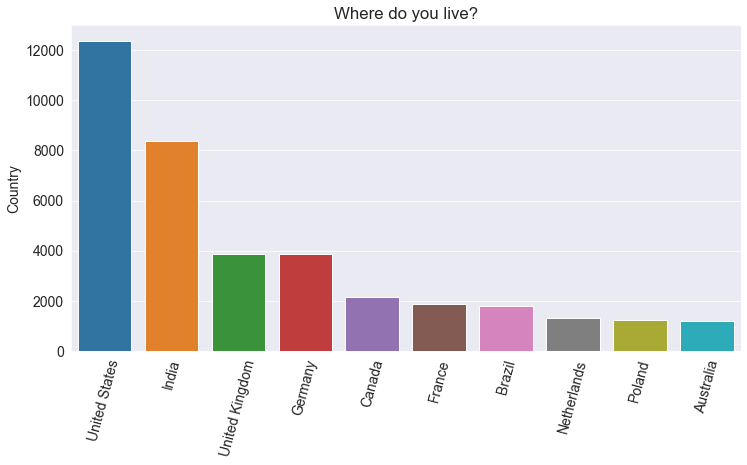

In [30]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)

sns.barplot(x=top_countries.index, y=top_countries);

Wydaje się, że nieproporcjonalnie duża liczba respondentów pochodzi z USA i Indii, prawdopodobnie dlatego, że ankieta jest prowadzona w języku angielskim, a kraje te mają największą populację anglojęzyczną. Już teraz widzimy, że ankieta może nie być reprezentatywna dla globalnej społeczności programistów - zwłaszcza z krajów nieanglojęzycznych. Programiści z krajów nieanglojęzycznych są prawie na pewno niedostatecznie reprezentowani.

#### Atrybut "Age"
Rozkład wieku respondentów jest kolejnym czynnikiem, na który warto zwrócić uwagę. Do wizualizacji użyjemy histogramu.

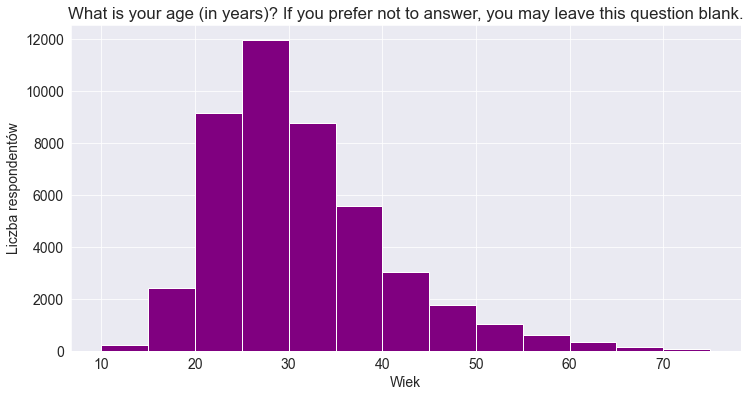

In [31]:
plt.figure(figsize=(12, 6))
plt.title(schema['Age'])
plt.xlabel('Wiek')
plt.ylabel('Liczba respondentów')

plt.hist(data['Age'], bins=np.arange(10,80,5), color='purple');

Wydaje się, że duży odsetek respondentów ma 20-45 lat. Jest to w pewnym stopniu reprezentatywne dla społeczności programistów w ogóle. Wielu młodych ludzi podjęło się informatyki jako kierunku studiów lub zawodu w ciągu ostatnich 20 lat.

Ćwiczenie: możesz odfiltrować odpowiedzi według wieku (lub grupy wiekowej), jeśli chcesz przeanalizować i porównać wyniki ankiety dla różnych grup wiekowych. Utwórz nową kolumnę o nazwie AgeGroup zawierającą wartości, takie jak Mniej niż 10 lat, 10-18 lat, 18-30 lat, 30-45 lat, 45-60 lat i Starsze niż 60 lat. Następnie powtórz analizę w pozostałej części tego notatnika dla każdej grupy wiekowej.

#### Atrybut "Gender"
Przyjrzyjmy się rozkładowi odpowiedzi dla płci. Powszechnie wiadomo, że kobiety i płcie niebinarne są niedostatecznie reprezentowane w społeczności programistów, więc możemy spodziewać się tutaj wypaczonej dystrybucji.

In [32]:
schema['Gender']

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [33]:
gender_counts = data['Gender'].value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

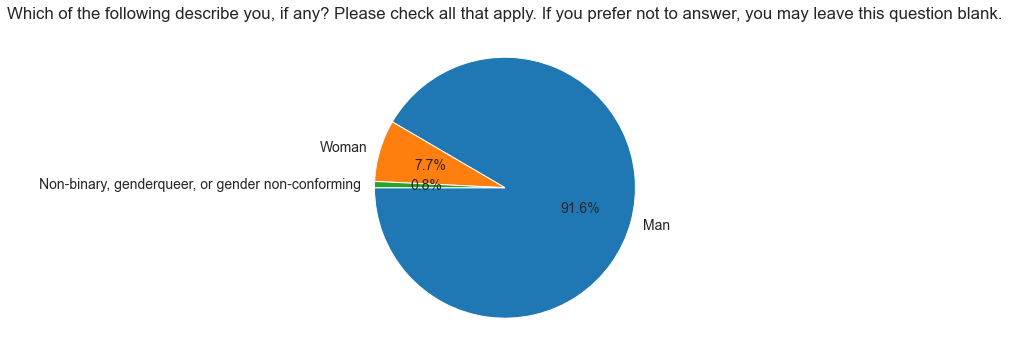

In [34]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Tylko około 8% respondentów, którzy odpowiedzieli na pytanie, identyfikuje się jako kobiety lub osoby niebinarne. Liczba ta jest niższa niż ogólny odsetek kobiet i niebinarnych płci w społeczności programistów - szacowany na około 12%.

#### Atrybutu "Education Level"
Formalne wykształcenie informatyczne jest często uważane za niezbędny warunek zostania programistą. Istnieje jednak wiele bezpłatnych zasobów i samouczków dostępnych online, aby nauczyć się programowania. Porównajmy poziom wykształcenia respondentów, aby uzyskać wgląd w to. Użyjemy tutaj poziomego wykresu słupkowego.

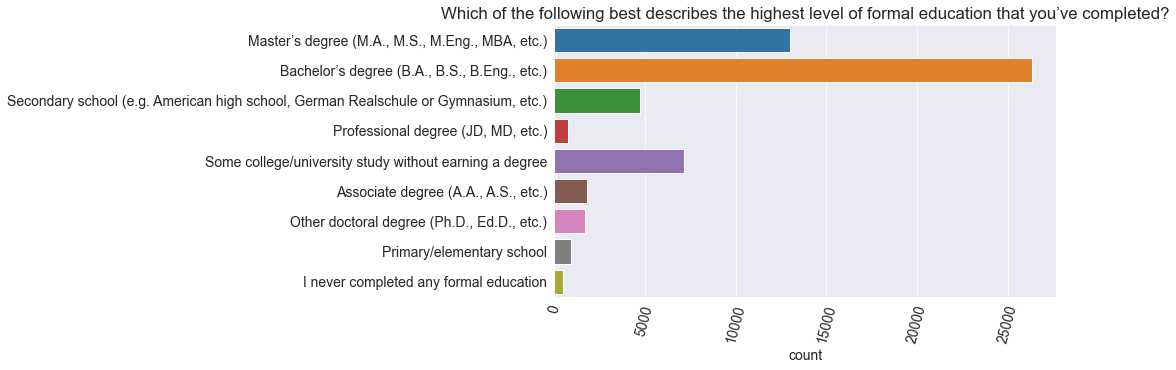

In [35]:
sns.countplot(y=data['EdLevel'])
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

Wydaje się, że ponad połowa respondentów posiada tytuł licencjata lub magistra, więc większość programistów wydaje się mieć wykształcenie wyższe. Jednak z samego tego wykresu nie wynika jasno, czy posiadają dyplom z informatyki.

Ćwiczenia: Wykres pokazuje obecnie liczbę respondentów dla każdej opcji. Czy możesz go zmodyfikować, aby zamiast tego pokazywał procent? Następnie spróbuj porównać wartości procentowe dla każdego stopnia dla mężczyzn i kobiet.

Narysujmy również kierunki studiów licencjackich, ale tym razem przekonwertujemy liczby na procenty i posortujemy wartości, aby ułatwić wizualizację kolejności.

In [36]:
schema.UndergradMajor

'What was your primary field of study?'

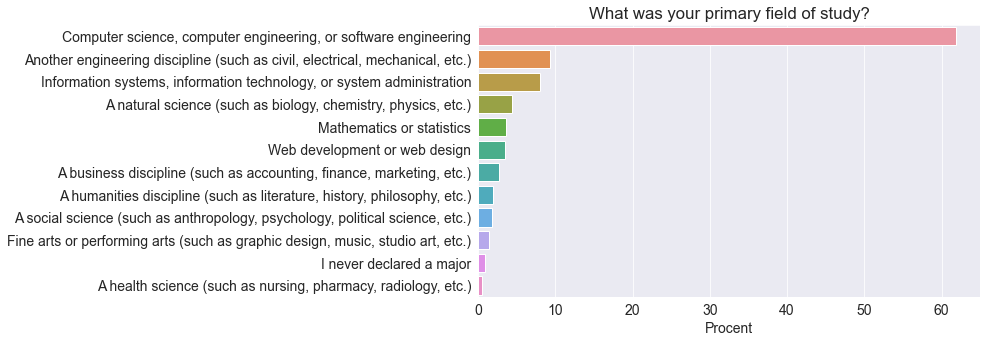

In [37]:
undergrad_pct = data['UndergradMajor'].value_counts() * 100 / data['UndergradMajor'].count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema['UndergradMajor'])
plt.ylabel(None);
plt.xlabel('Procent');

Okazuje się, że 40% programistów z wyższym wykształceniem ma kierunek inny niż informatyka - co jest bardzo zachęcające. Wydaje się to sugerować, że chociaż wykształcenie wyższe jest ogólnie pomocne, nie musisz studiować informatyki, aby odnieść sukces jako programista.

Ćwiczenia: Przeanalizuj kolumnę NEWEdImpt dla respondentów z wyższym wykształceniem w porównaniu z tymi, którzy ich nie mają. Czy dostrzegasz jakąś różnicę w opinii?

#### Atrybutu "Employment"
Praca na zlecenie lub praca na zlecenie to częsty wybór wśród programistów, więc byłoby interesujące porównać podział na pracę w pełnym wymiarze godzin, w niepełnym wymiarze godzin i pracę na własny rachunek. Zwizualizujmy dane z kolumny Zatrudnienie.

In [38]:
schema['Employment']

'Which of the following best describes your current employment status?'

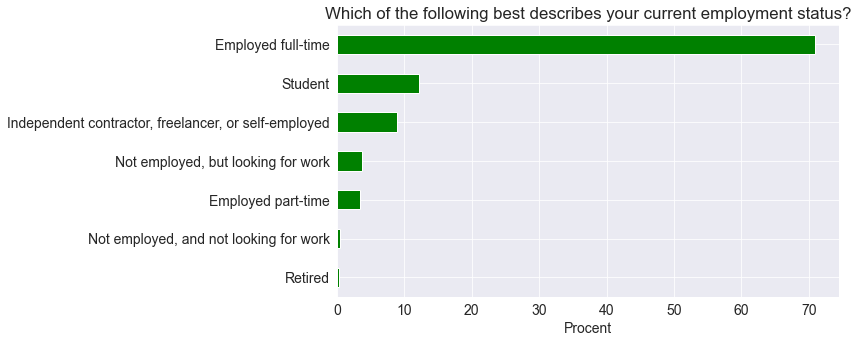

In [39]:
(data['Employment'].value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema['Employment'])
plt.xlabel('Procent');

The DevType field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon ;, making it a bit harder to analyze directly.

In [40]:
schema['DevType']

'Which of the following describe you? Please select all that apply.'

In [41]:
data['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                   4396
Developer, back-end                                                                                                                                                                                                                                                                                                                                                     3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                                                

Let's define a helper function that turns a column containing lists of values (like survey_df.DevType) into a data frame with one column for each possible option.

In [42]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [43]:
dev_type_df = split_multicolumn(data['DevType'])

In [44]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
WorkWeekHrs,23493,36.5
NEWOvertime,21430,33.3
YearsCodePro,20512,31.9
JobSat,19471,30.3
Age,19238,29.9
NEWEdImpt,16214,25.2
JobFactors,15365,23.9
DevType,15323,23.8
Gender,14191,22.1
UndergradMajor,13687,21.3


The dev_type_df has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is True. Otherwise, it is False.

We can now use the column-wise totals to identify the most common roles.

In [46]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

#### Najpopularniejszy język programowania w roku 2020?

Aby odpowiedzieć, możemy użyć kolumny LanguageWorkedWith. Podobnie jak w przypadku DevType, respondenci mogli wybrać tutaj wiele opcji.

In [47]:
data['LanguageWorkedWith']

0                                                                                                                                                      C#;HTML/CSS;JavaScript
1                                                                                                                                                            JavaScript;Swift
2                                                                                                                                                    Objective-C;Python;Swift
3                                                                                                                                                                         NaN
4                                                                                                                                                           HTML/CSS;Ruby;SQL
                                                                                         ...                                      

First, we'll split this column into a data frame containing a column of each language listed in the options.

In [48]:
languages_worked_df = split_multicolumn(data['LanguageWorkedWith'])

In [49]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

In [50]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

We can plot this information using a horizontal bar chart.

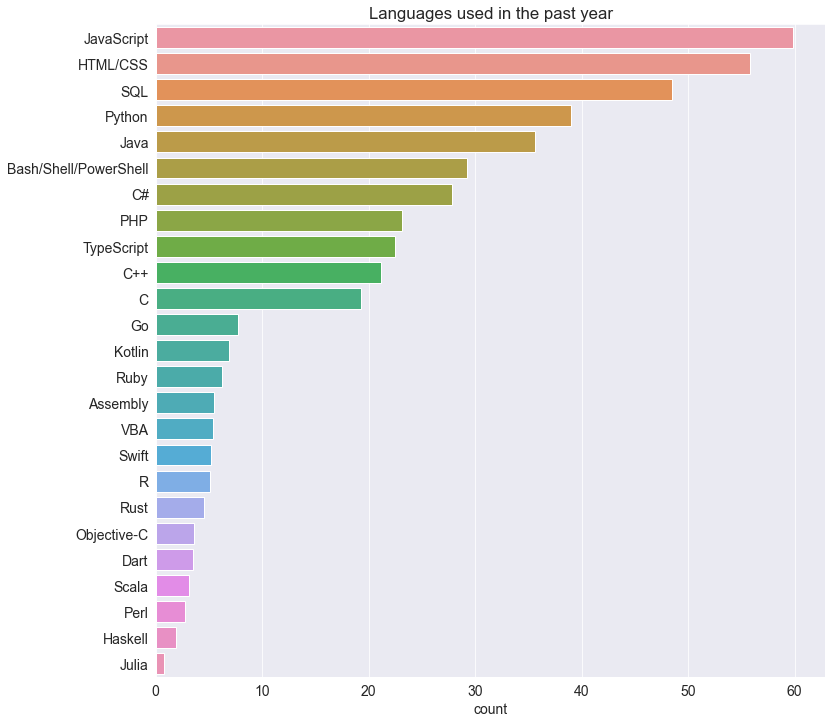

In [51]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.

#### Jak ważne jest by budować karierę w młodym wieku?

Stwórzmy wykres punktowy przedstawiający Age vs. YearsCodePro (tj. Lata doświadczenia w kodowaniu), aby odpowiedzieć na to pytanie.

In [52]:
schema['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

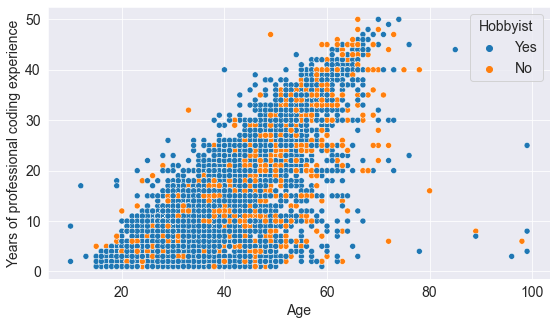

In [53]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=data)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

Punkty widoczne są na całym wykresie, co oznacza, że możesz zacząć programować zawodowo w każdym wieku. Wiele osób, które zajmują się programowaniem zawodowo od kilkudziesięciu lat, również lubi to robić jako hobby.

 We can also view the distribution of the Age1stCode column to see when the respondents tried programming for the first time

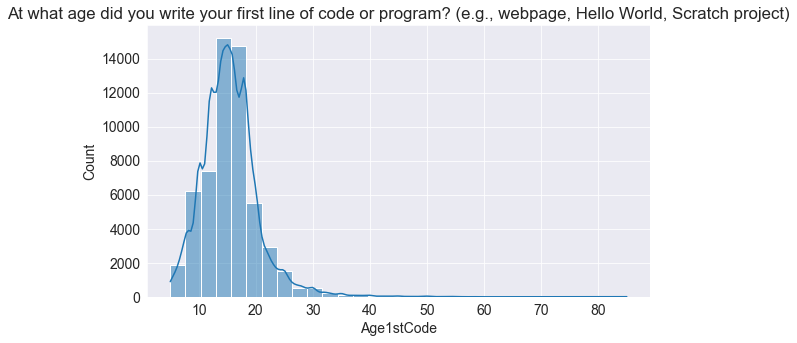

In [54]:
plt.title(schema.Age1stCode)
sns.histplot(x=data['Age1stCode'], bins=30, kde=True);

Jak można się było spodziewać, większość ludzi miała styczność z programowaniem przed czterdziestym rokiem życia. Jednak są ludzie w każdym wieku i ze wszystkich środowisk uczących się kodowania.

## Krok 4: Pomiar dokładności klasyfikacji

W ostatnim kroku usnuniemy jeszcze ze zbioru niepotrzebne atrybuty, takie jak:  
PassengerId - Atrybut okresląjący id pasażera, nie wnoszący nic do analizy danych  
ship - Atrybut zawsze przyjmujący tą samą wartość.  
Survived - Atrybut decyzyjny

In [55]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
#     'Gender',
#     'EdLevel',
#     'UndergradMajor',
    # Programming experience
#     'Hobbyist',
#     'Age1stCode',
#     'YearsCode',
#     'YearsCodePro',
#     'LanguageWorkedWith',
#     'LanguageDesireNextYear',
#     'NEWLearn',
#     'NEWStuck',
    # Employment
#     'Employment',
#     'DevType',
#     'WorkWeekHrs',
#     'JobSat',
#     'JobFactors',
#     'NEWOvertime',
#     'NEWEdImpt'
]

X_data = data[selected_columns].copy(deep=True)
X_data

,Country,Age
0,Germany,NaN
1,United Kingdom,NaN
2,Russian Federation,NaN
3,Albania,25.0
4,United States,31.0
...,...,...
64456,United States,NaN
64457,Morocco,NaN
64458,Viet Nam,NaN
64459,Poland,NaN


Aby uruchomić algorytm klasyfikacji musimy usunąć brakujące wartośći z atrybutu Age. Zrobimy to tym samym sposobem co w sprawozdaniu titanic.

In [56]:
mean = X_data["Age"].mean()
std = X_data["Age"].std()
is_null = X_data["Age"].isnull().sum()

#  Losujmey wartości z przedziału wartości średniej i odchylenia standardowego atrybutu "Age"
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

# Uzpełniamy puste wartości w atrybucie "Age" wylosowanymi wartościami
age_slice = X_data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
X_data["Age"] = age_slice
X_data["Age"] = X_data["Age"].astype(int)
X_data["Age"].isnull().sum()

0

In [57]:
X_data = X_data.dropna(axis=0, how='any')

In [58]:
total = X_data.isnull().sum().sort_values(ascending=False)
percent_1 = X_data.isnull().sum()/X_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(20)

,Total,%
Age,0,0.0
Country,0,0.0


In [ ]:
class ChainedAssignent:
    def __init__(self, chained=None):
        acceptable = [None, 'warn', 'raise']
        assert chained in acceptable, "chained must be in " + str(acceptable)
        self.swcw = chained

    def __enter__(self):
        self.saved_swcw = pd.options.mode.chained_assignment
        pd.options.mode.chained_assignment = self.swcw
        return self

    def __exit__(self, *args):
        pd.options.mode.chained_assignment = self.saved_swcw

In [59]:
freq = X_data['Country'].value_counts()
with ChainedAssignent():
    X_data['Country'][~X_data['Country'].isin(freq.index[:19])] = 'Other'
    X_data['Country'] = X_data['Country'].astype('category')
X_data['Country'].unique()

['Germany', 'United Kingdom', 'Russian Federation', 'Other', 'United States', ..., 'Switzerland', 'Pakistan', 'Romania', 'Turkey', 'Australia']
Length: 20
Categories (20, object): ['Germany', 'United Kingdom', 'Russian Federation', 'Other', ..., 'Pakistan', 'Romania', 'Turkey', 'Australia']

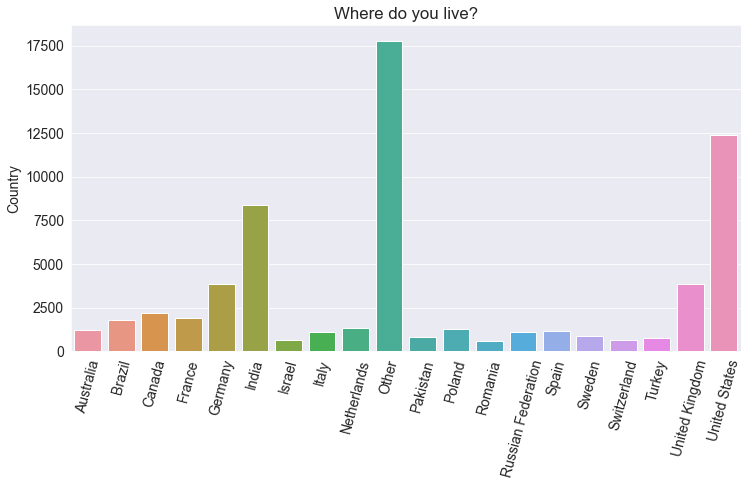

In [60]:
top_countries = X_data['Country'].value_counts().head(20)
top_countries
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)

sns.barplot(x=top_countries.index, y=top_countries);

In [61]:
Y_data = X_data['Country'].copy();
X_data = X_data.drop('Country', axis=1)
le = preprocessing.LabelEncoder()
le.fit(Y_data)
Y_data = le.transform(Y_data)

decision_tree = DecisionTreeClassifier()
scores = cross_val_score(decision_tree, X_data, Y_data, cv=10)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.29 accuracy with a standard deviation of 0.01


Udało się uzyskać dokładność na poziomie około 29%.

## Krok 5: Podsumowanie

Przygotowanie zbioru pozwala wykorzystać go w różnego rodzaju analizach. Również przygotowany zbiór pozowli zauważyć więcej zależnosći w danych oraz uzyskać lepsze wyniki podczas wykorzystania algorytmów uczenia maszynowego.

Z ankiety wyciągnęliśmy wiele wniosków. Oto podsumowanie kilku z nich:

Na podstawie danych demograficznych respondentów badania możemy wywnioskować, że badanie jest w pewnym stopniu reprezentatywne dla całej społeczności programistów. Jednak ma mniej odpowiedzi od programistów z krajów nieanglojęzycznych oraz kobiet i niebinarnych płci.

Społeczność programistów nie jest tak różnorodna, jak może być. Chociaż sytuacja się poprawia, powinniśmy dołożyć większych starań, aby wspierać i zachęcać niedostatecznie reprezentowane społeczności, czy to pod względem wieku, kraju, rasy, płci, czy w inny sposób.

Chociaż większość programistów ma wyższe wykształcenie, dość duży odsetek nie ma informatyki na kierunku studiów. Dlatego stopień informatyki nie jest obowiązkowy do nauki kodowania lub budowania kariery programistycznej.

Znaczny odsetek programistów pracuje w niepełnym wymiarze godzin lub jako freelancerzy, co może być świetnym sposobem na wejście w tę dziedzinę, zwłaszcza gdy dopiero zaczynasz.

Javascript i HTML / CSS to najczęściej używane języki programowania w 2020 roku, tuż za nimi plasują się SQL i Python.

Python to język, którym większość ludzi jest zainteresowana nauką - ponieważ jest to łatwy do nauczenia język programowania ogólnego przeznaczenia, dobrze dostosowany do różnych dziedzin.

Rust i TypeScript to najbardziej „lubiane” języki w 2020 r., Z których oba mają małe, ale szybko rozwijające się społeczności. Python jest blisko trzeci, mimo że jest już szeroko używanym językiem.

Wydaje się, że programiści na całym świecie pracują średnio około 40 godzin tygodniowo, z niewielkimi różnicami w zależności od kraju.

Możesz się uczyć i zacząć programować zawodowo w każdym wieku. Prawdopodobnie będziesz mieć długą i satysfakcjonującą karierę, jeśli hobby to także programowanie.